### MMDetection 설치

#### pytorch, torchvision 다운그레이드

In [ ]:
# pytorch 임포트
import torch
print(torch.__version__)

2.0.0+cu118


In [ ]:
# pytorch 다운그레이드
!pip install torch==2.0.0 torchvision==0.15.1  --index-url https://download.pytorch.org/whl/cu118

Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 GB 563.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.3/132.3 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lit: filename=lit-15.0.7-py3-none-any.whl size=89991 sha256=dd30075d3b17ab67f5b47b9d909d575ef43cb5b5ec48a0bfe600290448ff315c
  Stored in directory: /root/.cache/pip/wheels/fc/5d/45/34fe9945d5e45e261134e72284395be36c2d4828af38e2b0fe
Successfully built lit
  Attempting uninstall: triton
    Found existing installation: triton 3.1.0
    Uninstalling triton-3.1.0:
      Successfully uninstalled triton-3.1.0
  Attempting uninstall: torch
    Found existing installation: torch 2.5.1+cu124
    Uninstalling torch-2.5.1+cu124:
      Successfully uninstalled to

#### mmcv-full 및 mmdetection 설치

In [ ]:
# mmcv를 위해서 mmcv-full을 먼저 설치
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html

# 실습 코드는 mmdetection 2.x 기준임.
# 따라서 mmdetection 2.x branch의 소스코드 기반으로 mmdetection 설치
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.2/256.2 kB 22.2 MB/s eta 0:00:00
Cloning into 'mmdetection'...
remote: Enumerating objects: 38023, done.
remote: Total 38023 (delta 0), reused 0 (delta 0), pack-reused 38023 (from 1)
Receiving objects: 100% (38023/38023), 63.25 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (26223/26223), done.
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://bl

In [ ]:
# 아래를 수행하기 전에 kernel을 restart 해야 함.
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.11/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [ ]:
### 반드시 numpy downgrade를 mmcv 설치 후에 실행할것.
!pip install numpy==1.23

DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/terminaltables-3.1.10-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/mmdet-2.28.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 88.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.23.0-cp311-cp311-linux_x86_64.whl size=19730275 sha256=92fd49e0e98c021a56353b85d13f575e588708ada31ff8b1695756de4f01d13e
  Stored in directory: /root/.cache/pip/wheel

### KITTI Dataset 다운로드

In [ ]:
# KITTI Dataset 다운로드 후 압축 해제
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2025-02-28 06:54:26--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.42.203, 163.181.42.177, 163.181.42.175, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.42.203|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  28.1MB/s    in 0.2s    

2025-02-28 06:54:27 (28.1 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



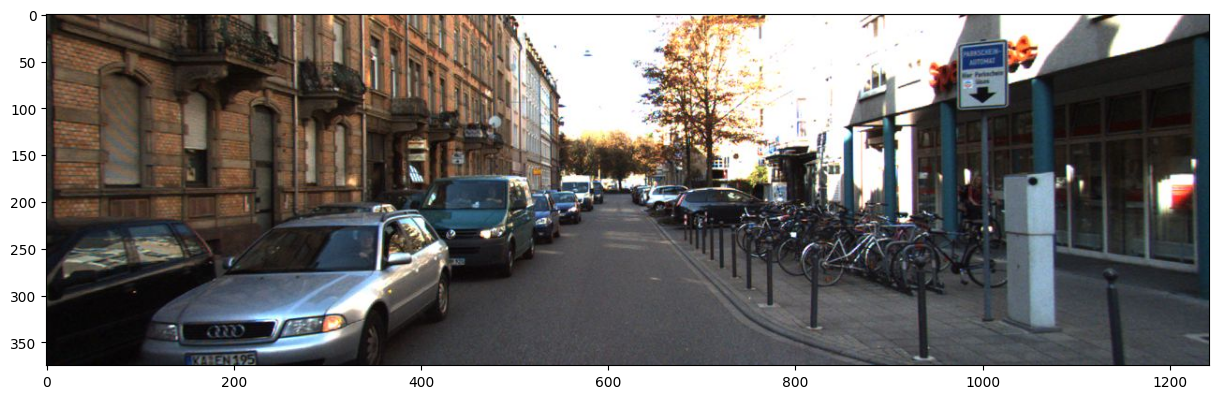

In [ ]:
import matplotlib.pyplot as plt
import cv2

# 이미지 하나 확인
img = cv2.cvtColor(cv2.imread('/content/kitti_tiny/training/image_2/000068.jpeg'), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img)

### KITTI DATA FORMAT 확인
* 첫번째 컬럼은 해당 오브젝트의 클래스 명.
* 5번째~8번째가 BOUNDING BOX 정보임. 좌상단(xmin, ymin), 우하단(xmax, ymax) 좌표 임.

In [ ]:
# 000068 이미지에 있는 객체들의 정보를 텍스트로 출력.
# ex. Car 0.25 0 1.94 69.26 200.28 435.08 374.00 1.46 1.62 4.04 -3.00 1.79 6.98 1.55
# 클래스, 객체가 경계에 잘린 정도, 다른 물체에 가려진 정도, 시야각, 바운딩 박스 x1, y1, x2, y2, 객체 높이, 너비, 길이, 객체 3차원 위치 좌표 x, y, z, 객체 회전 각도.
!cat /content/kitti_tiny/training/label_2/000068.txt

Car 0.25 0 1.94 69.26 200.28 435.08 374.00 1.46 1.62 4.04 -3.00 1.79 6.98 1.55
Car 0.80 1 2.26 0.00 209.20 198.59 374.00 1.46 1.58 3.72 -5.44 1.85 6.22 1.56
Cyclist 0.97 0 2.34 1210.28 199.77 1241.00 374.00 1.55 0.57 1.73 4.04 1.69 3.57 -3.14
Car 0.00 2 1.68 478.18 187.68 549.54 249.43 1.57 1.60 3.99 -2.73 2.03 20.96 1.55
Car 0.00 1 1.66 530.03 187.79 573.10 226.09 1.52 1.54 3.68 -2.53 2.20 31.50 1.58
Van 0.00 1 1.63 547.61 171.12 584.05 212.41 2.47 1.98 5.81 -2.79 2.41 46.44 1.57
Car 0.00 1 -0.16 667.74 182.35 790.82 230.38 1.62 1.65 4.14 4.19 1.99 25.95 0.00
Car 0.00 2 -0.11 657.37 184.48 763.34 221.64 1.55 1.66 4.47 4.35 2.10 32.00 0.02
Car 0.00 1 -0.01 637.45 180.34 714.44 212.34 1.69 1.76 4.12 3.59 2.12 39.79 0.08
Van 0.00 1 1.61 572.52 175.02 596.26 199.95 2.13 1.91 6.40 -2.28 2.36 65.43 1.57
Van 0.00 1 1.77 380.78 167.69 523.29 288.56 1.95 1.75 4.63 -2.89 1.90 14.05 1.57
Cyclist 0.00 1 1.09 958.95 167.55 1036.88 254.43 1.68 0.53 1.96 7.95 1.59 14.95 1.57


### kitti Dataset의 annotation을 MMDetection에 맞게 변형하고, 기존 config 파일을 kitti에 맞게 변형.

In [ ]:
import copy
import os.path as osp
import cv2
import mmcv
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

# KITTI Tiny 데이터셋의 annotation 파일을 MMDetection에서 사용할 수 있도록 변환하는 클래스 정의
# 즉, mmdetection에 정의되어 있는 CustomDataset을 상속받아 우리가 사용할 다양한 데이터셋을 mmdetection이 이해하기 쉬운 형태로 변환하는 클래스와 함수 정의.
# 반드시 아래 Decorator 설정 할것.
# @DATASETS.register_module() 설정 시 force=True를 입력하지 않으면 Dataset 재등록 불가.
@DATASETS.register_module(force=True)
class KittyTinyDataset(CustomDataset):
  # 원본 kitti Dataset는 10개의 Class로 되어 있음. 여기서는 'Car', 'Truck', 'Pedestrian', 'Cyclist'만 사용
  # 커스텀 데이터셋에서 사용할 클래스명 저장.
  CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')

  # 상속받은 CustomDataset에 미리 정의되어 있는 __init__(self, ann_file)에서 클래스가 정의될 때 ann_filer값을 받아 self.ann_file의 값으로 사용하고,
  # load_annotations()의 인자인 ann_file의 경우 해당 메서드가 사용될 때 할당받음.
  # 현재 코드에서는 두 값이 같은 값을 받을 것으로 예상.
  def load_annotations(self, ann_file):

    # 변환이 끝난 전체 annotation 파일을 담을 list 객체
    data_infos = []

    print('##### self.data_root:', self.data_root, 'self.ann_file:', self.ann_file, 'self.img_prefix:', self.img_prefix)
    print('#### ann_file:', ann_file)
    # 결과물 (경로와 파일 이름)
    ##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/train.txt self.img_prefix: /content/kitti_tiny/training/image_2
    #### ann_file: /content/kitti_tiny/train.txt

    # 클래스 이름 - 정수 인덱스 매핑
    # 결과 -> 'Car': 0, 'Truck': 1, 'Pedestrian': 2, 'Cyclist': 3
    cat2label = {k:i for i, k in enumerate(self.CLASSES)}

    # self.ann_file에 할당된 train.txt에서 이미지 리스트 불러옴.
    # list_from_file -> 텍스트 파일의 각 줄을 읽어 리스트로 반환
    # ex. 000001, 000002, 000003 ...
    image_list = mmcv.list_from_file(self.ann_file)

    # 각 이미지 처리 반복문. (image_list에서 이미지 이름 하나씩 받아옴.)
    for image_id in image_list:
      # 받아온 이미지 이름을 통해 이미지 파일 경로 생성
      filename = '{0:}/{1:}.jpeg'.format(self.img_prefix, image_id)

      # 생성한 경로를 통해 이미지를 불러오고, 너비와 높이값 구하기.
      image = cv2.imread(filename)
      height, width = image.shape[:2]

      # 개별 image의 annotation 정보 저장용 Dict 생성. (이미지 이름, 경로, 너비, 높이 등.)
      # 추후 구하는 이미지 추가 정보를 저장할 공간.
      data_info = {'filename': str(image_id) + '.jpeg',
                   'width': width, 'height': height}

      # 이미지 경로인 self.img_prefix를 살짝 변환해 라벨 폴더로 향하는 경로 생성.
      # 라벨 폴더 -> 이미지의 annotation 정보가 담긴 이미지.txt 파일 저장된 곳.
      label_prefix = self.img_prefix.replace('image_2', 'label_2')

      # 현재 ID 이미지의 annotation 파일을 1줄 씩 읽어서 list로 로드
      lines = mmcv.list_from_file(osp.join(label_prefix, str(image_id)+'.txt'))

      # 읽어온 파일을 공백을 기준으로 정보를 잘라서 변환.
      # 즉, 한줄씩(한 객체씩) 보기 편하게 변환해 content에 저장.
      content = [line.strip().split(' ') for line in lines]

      # 오브젝트의 클래스명은 bbox_names로 저장.
      bbox_names = [x[0] for x in content]

      # 각 객체의 바운딩 박스 좌표 저장
      bboxes = [ [float(info) for info in x[4:8]] for x in content]

      # 현재 특정 클래스만 사용할 것이기에, 사용 안하는 대상 구분.
      gt_bboxes = [] # 사용할 객체 바운딩 박스
      gt_labels = [] # 사용할 객체 클래스 ID
      gt_bboxes_ignore = [] # 사용 안하는 객체 바운딩 박스
      gt_labels_ignore = [] # 사용 안하는 객체 클래스 ID

      for bbox_name, bbox in zip(bbox_names, bboxes):
        # bbox_name에 담긴 클래스가 쓸 클래스만 저장해논 cat2label에 있다면,
        # 사용할 리스트에 저장.
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          # gt_labels에는 class id를 입력
          gt_labels.append(cat2label[bbox_name])

        # 아니면 사용 안할 리스트에 저장.
        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1) # 클래스 ID = -1로 통일.

      # 개별 image별 annotation 정보를 가지는 Dict 생성.
      data_anno = {
          'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
          'labels': np.array(gt_labels, dtype=np.long),
          'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
          'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }

      # 이렇게 추출한 정보를 기존 annotation 정보 저장용 Dict인 data_info에 추가.
      # 이렇게 하면 한 객체에 대한 하나의 annotation 파일 생성 완료.
      data_info.update(ann=data_anno)

      # 마지막으로 전체 객체의 annotation 파일을 저장하는 data_infos에 data_info 추가
      data_infos.append(data_info)

    return data_infos

In [ ]:
# config 파일, pretrained 모델 경로 설정
config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# pretrained 모델 다운로드 (config 파일은 이미 있음.)
!cd mmdetection; mkdir checkpoints
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2025-02-28 06:54:40--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.42.203, 163.181.42.177, 163.181.42.175, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.42.203|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M   139MB/s    in 1.1s    

2025-02-28 06:54:41 (139 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
# 기존 config 파일 정보를 KittyTinyDataset 클래스에 맞게 설정.
from mmcv import Config
from mmdet.apis import set_random_seed

# config 파일 불러오기.
cfg = Config.fromfile(config_file)

# dataset에 대한 환경 파라미터 수정.
cfg.dataset_type = 'KittyTinyDataset'
cfg.data_root = '/content/kitti_tiny/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정.
cfg.data.train.type = 'KittyTinyDataset'
cfg.data.train.data_root = '/content/kitti_tiny/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'training/image_2'

cfg.data.val.type = 'KittyTinyDataset'
cfg.data.val.data_root = '/content/kitti_tiny/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'training/image_2'

cfg.data.test.type = 'KittyTinyDataset'
cfg.data.test.data_root = '/content/kitti_tiny/'
cfg.data.test.ann_file = 'val.txt'
cfg.data.test.img_prefix = 'training/image_2'

# class의 갯수 수정.
# KittyTinyDataset 클래스에서 설정했던 클래스 갯수로 수정
cfg.model.roi_head.bbox_head.num_classes = 4

# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리 설정.
cfg.work_dir = './tutorial_exps'

# 학습율 변경 환경 파라미터 설정.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 10

# config 수행 시마다 policy값이 없어지는 bug로 인하여 설정.
cfg.lr_config.policy = 'step'

# 평가 metric 설정.
cfg.evaluation.metric = 'mAP'

# 12번의 학습마다 평가 진행
cfg.evaluation.interval = 12

# 12번의 학습마다 모델 체크포인트 저장.
cfg.checkpoint_config.interval = 12

# 랜덤시드 설정 및 gpu 설정
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)

# ConfigDict' object has no attribute 'device 오류 발생시 반드시 설정 필요. https://github.com/open-mmlab/mmdetection/issues/7901
cfg.device='cuda'


# 설정값 출력
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

### train 데이터셋 생성 후, 변형한 config 파일에 따라 모델 학습 수행.

In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# 위에서 정의한 클래스와 새로 설정한 config 파일을 사용해 실질적으로 커스텀 데이터셋이 생성되는 부분.
# train용 Dataset 생성.
datasets = [build_dataset(cfg.data.train)]

# 모델 생성
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))

# 모델이 훈련을 통해 인식할 클래스 정보를 훈련 데이터에서 가져와 입력.
model.CLASSES = datasets[0].CLASSES

# config에 pretrained 모델 지정이 상대 경로로 설정됬으므로, %cd mmdetection 지정 필요.
%cd mmdetection

# 훈련 중 로그, 체크포인트 등을 저장하는 폴더 생성.
# mkdir_or_exist(osp.abspath("경로"))
mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))

# 모델 훈련
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회
train_detector(model, datasets, cfg, distributed=False, validate=True)

##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/train.txt self.img_prefix: /content/kitti_tiny/training/image_2
#### ann_file: /content/kitti_tiny/train.txt


<ipython-input-5-6898457a0105>:96: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'labels': np.array(gt_labels, dtype=np.long),
<ipython-input-5-6898457a0105>:98: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `

/content/mmdetection


2025-02-28 06:54:49,466 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
2025-02-28 06:54:49,535 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/val.txt self.img_prefix: /content/kitti_tiny/training/image_2
#### ann_file: /content/kitti_tiny/val.txt


2025-02-28 06:54:49,704 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([5, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([5]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([16, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([16]).
2025-02-28 06:54:49,716 - mmdet - INFO - Start running, host: root@95bb8817fdda, work_dir: /content/mmdetection/tutorial_exps
2025-02-28 06:54:49,717 - mmdet - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH  

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 25/25, 11.3 task/s, elapsed: 2s, ETA:     0s
---------------iou_thr: 0.5---------------


2025-02-28 06:57:01,735 - mmdet - INFO - 
+------------+-----+------+--------+-------+
| class      | gts | dets | recall | ap    |
+------------+-----+------+--------+-------+
| Car        | 62  | 146  | 0.968  | 0.867 |
| Truck      | 3   | 21   | 1.000  | 0.600 |
| Pedestrian | 13  | 54   | 0.923  | 0.781 |
| Cyclist    | 7   | 49   | 0.714  | 0.202 |
+------------+-----+------+--------+-------+
| mAP        |     |      |        | 0.612 |
+------------+-----+------+--------+-------+
2025-02-28 06:57:01,814 - mmdet - INFO - Epoch(val) [12][25]	AP50: 0.6120, mAP: 0.6124


### 학습된 model을 이용하여 inference 수행.

/usr/local/lib/python3.11/dist-packages/mmdet-2.28.2-py3.11.egg/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


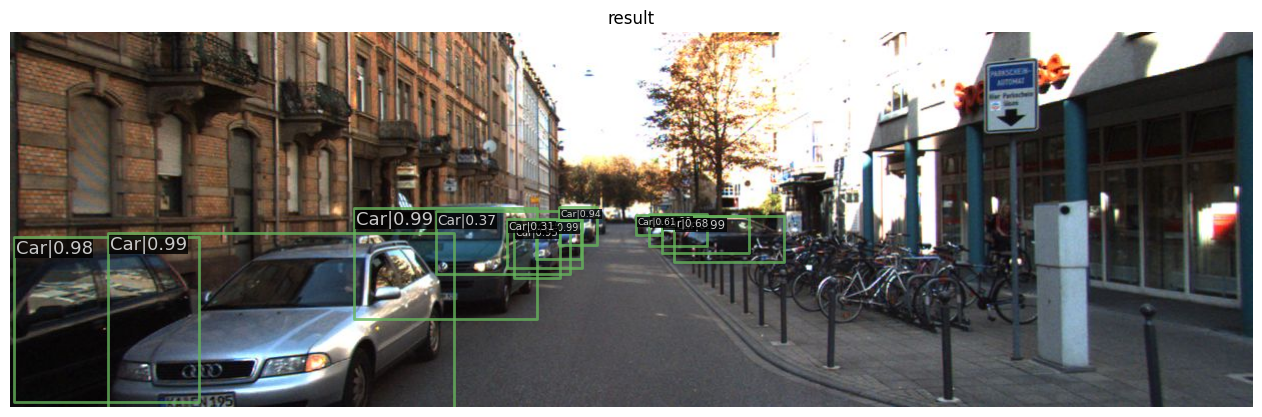

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/content/kitti_tiny/training/image_2/000068.jpeg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result)

### 학습된 모델을 이용하여 Video Detection 수행하기

In [ ]:
%cd /content
!mkdir /content/data
!wget -O /content/data/the_rock_chase.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/the_rock_chase.mp4?raw=true

/content
--2025-02-28 06:57:12--  https://github.com/chulminkw/DLCV/blob/master/data/video/the_rock_chase.mp4?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/the_rock_chase.mp4 [following]
--2025-02-28 06:57:12--  https://github.com/chulminkw/DLCV/raw/refs/heads/master/data/video/the_rock_chase.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/the_rock_chase.mp4 [following]
--2025-02-28 06:57:13--  https://raw.githubusercontent.com/chulminkw/DLCV/refs/heads/master/data/video/the_rock_chase.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuser

In [ ]:
CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')
labels_to_names_seq = {i:k for i, k in enumerate(CLASSES)}

def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  results = inference_detector(model, img_array)

  for result_ind, result in enumerate(results):
    if len(result) == 0:
      continue

    result_filtered = result[np.where(result[:, 4] > score_threshold)]

    for i in range(len(result_filtered)):
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)
      if is_print:
        print(caption)

  return draw_img

In [ ]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):

    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size)

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)
    btime = time.time()
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        stime = time.time()
        img_frame = get_detected_img(model, img_frame,  score_threshold=score_threshold, is_print=False)
        if do_print:
          print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))

In [ ]:
do_detected_video(model, '/content/data/the_rock_chase.mp4', '/content/data/the_rock_chase_out1.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 503
frame별 detection 수행 시간: 0.1712
frame별 detection 수행 시간: 0.1465
frame별 detection 수행 시간: 0.1104
frame별 detection 수행 시간: 0.1116
frame별 detection 수행 시간: 0.1135
frame별 detection 수행 시간: 0.1112
frame별 detection 수행 시간: 0.1122
frame별 detection 수행 시간: 0.1103
frame별 detection 수행 시간: 0.1093
frame별 detection 수행 시간: 0.1067
frame별 detection 수행 시간: 0.1107
frame별 detection 수행 시간: 0.1129
frame별 detection 수행 시간: 0.112
frame별 detection 수행 시간: 0.1123
frame별 detection 수행 시간: 0.1072
frame별 detection 수행 시간: 0.1108
frame별 detection 수행 시간: 0.1132
frame별 detection 수행 시간: 0.1088
frame별 detection 수행 시간: 0.1126
frame별 detection 수행 시간: 0.1227
frame별 detection 수행 시간: 0.1206
frame별 detection 수행 시간: 0.1197
frame별 detection 수행 시간: 0.1188
frame별 detection 수행 시간: 0.1178
frame별 detection 수행 시간: 0.1204
frame별 detection 수행 시간: 0.1167
frame별 detection 수행 시간: 0.1119
frame별 detection 수행 시간: 0.1144
frame별 detection 수행 시간: 0.1183
frame별 detection 수행 시간: 0.1179
frame별 detection 수행 시간: 0.1149
frame별 detection 수행 시간: 